In [109]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

分类

In [110]:
iris = load_iris()

X = iris.data
y = iris.target

In [111]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [112]:
y.shape

(150,)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

In [114]:
plst = params.items()

In [115]:
plst

dict_items([('booster', 'gbtree'), ('objective', 'multi:softmax'), ('num_class', 3), ('gamma', 0.1), ('max_depth', 6), ('lambda', 2), ('subsample', 0.7), ('colsample_bytree', 0.7), ('min_child_weight', 3), ('silent', 1), ('eta', 0.1), ('seed', 1000), ('nthread', 4)])

c:\Users\ASUS\.conda\envs\torch_env\lib\site-packages\xgboost\core.py:160: UserWarning: [14:00:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 96.67 % 


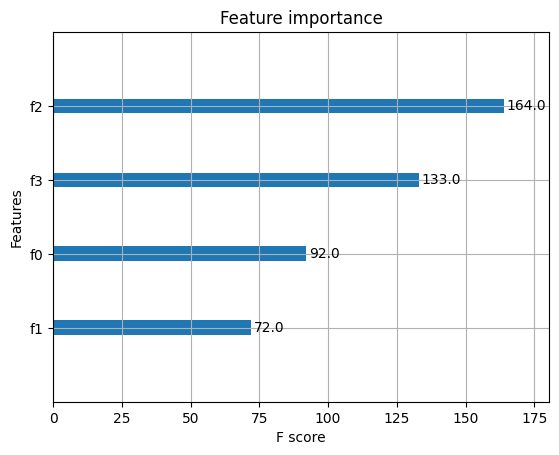

In [116]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(list(plst), dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

多变量分类

回归

In [117]:
import pandas as pd
# 读取文件原始数据
data = []
labels = []
# with open("lppz5.csv", encoding='UTF-8') as fileObject:
#     for line in fileObject:
#         line_split = line.split(',')
#         data.append(line_split[10:])
#         labels.append(line_split[8])

In [118]:
data = pd.read_excel('./data.xlsx')

In [119]:
data.head()

,时间,测风塔10米风速,测风塔30米风速,测风塔50米风速,测风塔70米风速,测风塔10米风向,测风塔30米风向,测风塔50米风向,测风塔70米风向,温度,气压,湿度,实际发电功率
0,2019-01-01 00:00:00,2.803,3.355,3.704,4.454,214.542,226.497,230.991,248.016,13.155,874.684,56.987,3.493000
1,2019-01-01 00:15:00,3.031,2.949,3.498,3.560,216.250,232.957,235.204,256.954,13.139,874.640,57.458,4.330333
2,2019-01-01 00:30:00,2.068,2.519,3.142,3.662,250.506,258.277,256.066,267.296,13.129,874.626,57.288,3.617333
3,2019-01-01 00:45:00,2.676,2.468,3.525,3.944,236.935,255.176,253.468,266.783,13.125,874.484,57.516,2.656667
4,2019-01-01 01:00:00,3.132,2.899,3.422,3.612,209.531,229.481,230.442,248.507,13.117,874.356,58.049,3.807000


In [120]:
data = data.set_index('时间')
data

,测风塔10米风速,测风塔30米风速,测风塔50米风速,测风塔70米风速,测风塔10米风向,测风塔30米风向,测风塔50米风向,测风塔70米风向,温度,气压,湿度,实际发电功率
时间,,,,,,,,,,,,
2019-01-01 00:00:00,2.803,3.355,3.704,4.454,214.542,226.497,230.991,248.016,13.155,874.684,56.987,3.493000
2019-01-01 00:15:00,3.031,2.949,3.498,3.560,216.250,232.957,235.204,256.954,13.139,874.640,57.458,4.330333
2019-01-01 00:30:00,2.068,2.519,3.142,3.662,250.506,258.277,256.066,267.296,13.129,874.626,57.288,3.617333
2019-01-01 00:45:00,2.676,2.468,3.525,3.944,236.935,255.176,253.468,266.783,13.125,874.484,57.516,2.656667
2019-01-01 01:00:00,3.132,2.899,3.422,3.612,209.531,229.481,230.442,248.507,13.117,874.356,58.049,3.807000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-07 22:45:00,8.979,10.443,11.421,12.651,78.284,82.906,75.628,81.034,13.198,869.910,76.622,199.073000
2019-02-07 23:00:00,7.479,9.024,10.274,11.941,76.038,79.501,72.071,77.804,13.184,869.994,78.559,197.545670
2019-02-07 23:15:00,9.232,10.927,12.514,14.129,73.593,77.969,71.614,77.102,13.175,869.726,78.249,197.971330


In [121]:
labels = data['实际发电功率']

In [122]:
data = data.drop('实际发电功率', axis=1)

In [123]:
import numpy as np

In [124]:
# data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# 标准化
# data = data.apply(lambda x:(x-x.mean())/x.std())

In [125]:
data_np = data.to_numpy()

In [126]:
labels_np = labels.to_numpy()

In [127]:
data_np

array([[0.14337683, 0.16723057, 0.18206273, ..., 0.13245823, 0.6676332 ,
        0.42725926],
       [0.15654233, 0.1447113 , 0.17097972, ..., 0.12609387, 0.66563972,
        0.4343052 ],
       [0.10093544, 0.12086084, 0.15182655, ..., 0.12211615, 0.66500544,
        0.43176208],
       ...,
       [0.51460908, 0.58722059, 0.65604993, ..., 0.14041368, 0.44300471,
        0.74532889],
       [0.53360665, 0.58300516, 0.64647334, ..., 0.13802705, 0.44431859,
        0.73243377],
       [0.55705047, 0.60979533, 0.66288266, ..., 0.13365155, 0.45387822,
        0.74859006]])

In [128]:
labels_np

array([  3.493   ,   4.330333,   3.617333, ..., 197.97133 , 198.03299 ,
       198.333   ])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data_np, labels_np, test_size=0.1, random_state=0)

In [130]:
X_test.shape

(365, 11)

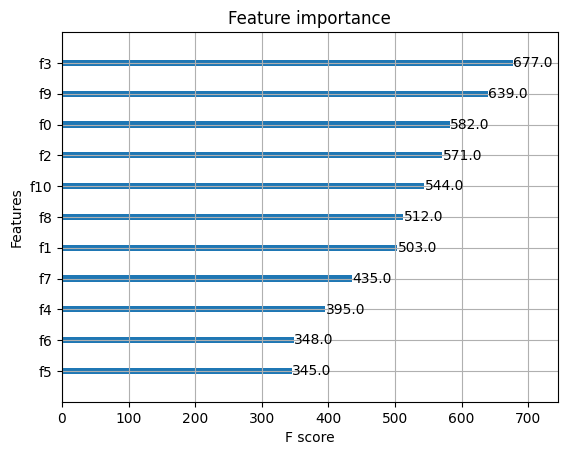

In [131]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 300
plst = params.items()
model = xgb.train(list(plst), dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 显示重要特征
plot_importance(model)
plt.show()

In [132]:
ans.shape

(365,)

In [133]:
y_test.shape

(365,)

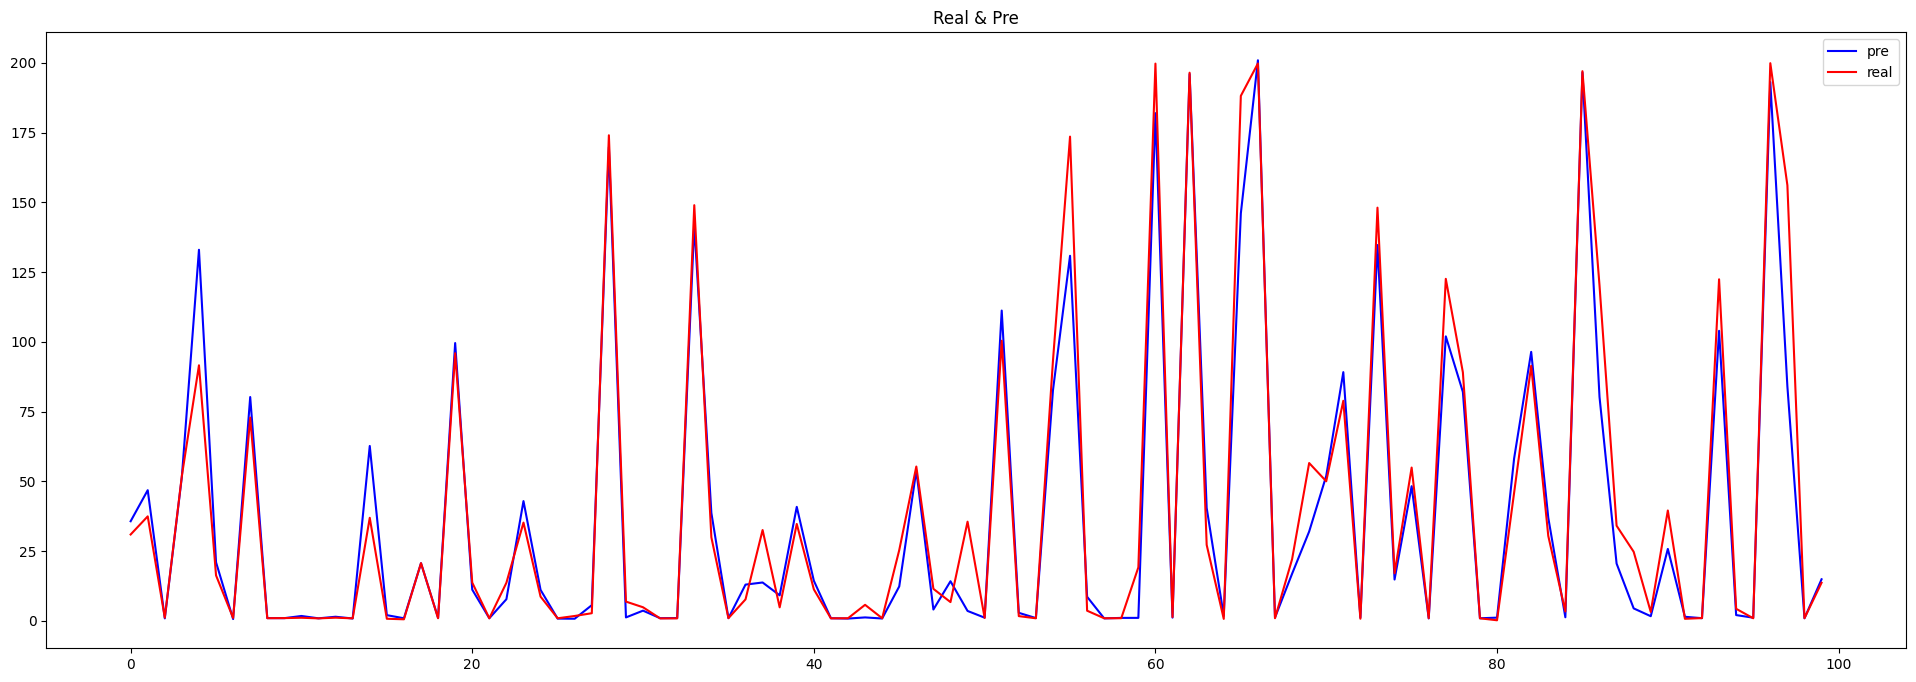

In [134]:
plt.figure(figsize=(24, 8))   
plt.plot(ans[:100], color='blue',label='pre')
plt.plot(y_test[:100], color='red', label='real')


plt.legend(loc='best')
plt.title('Real & Pre')
plt.show(block=False)

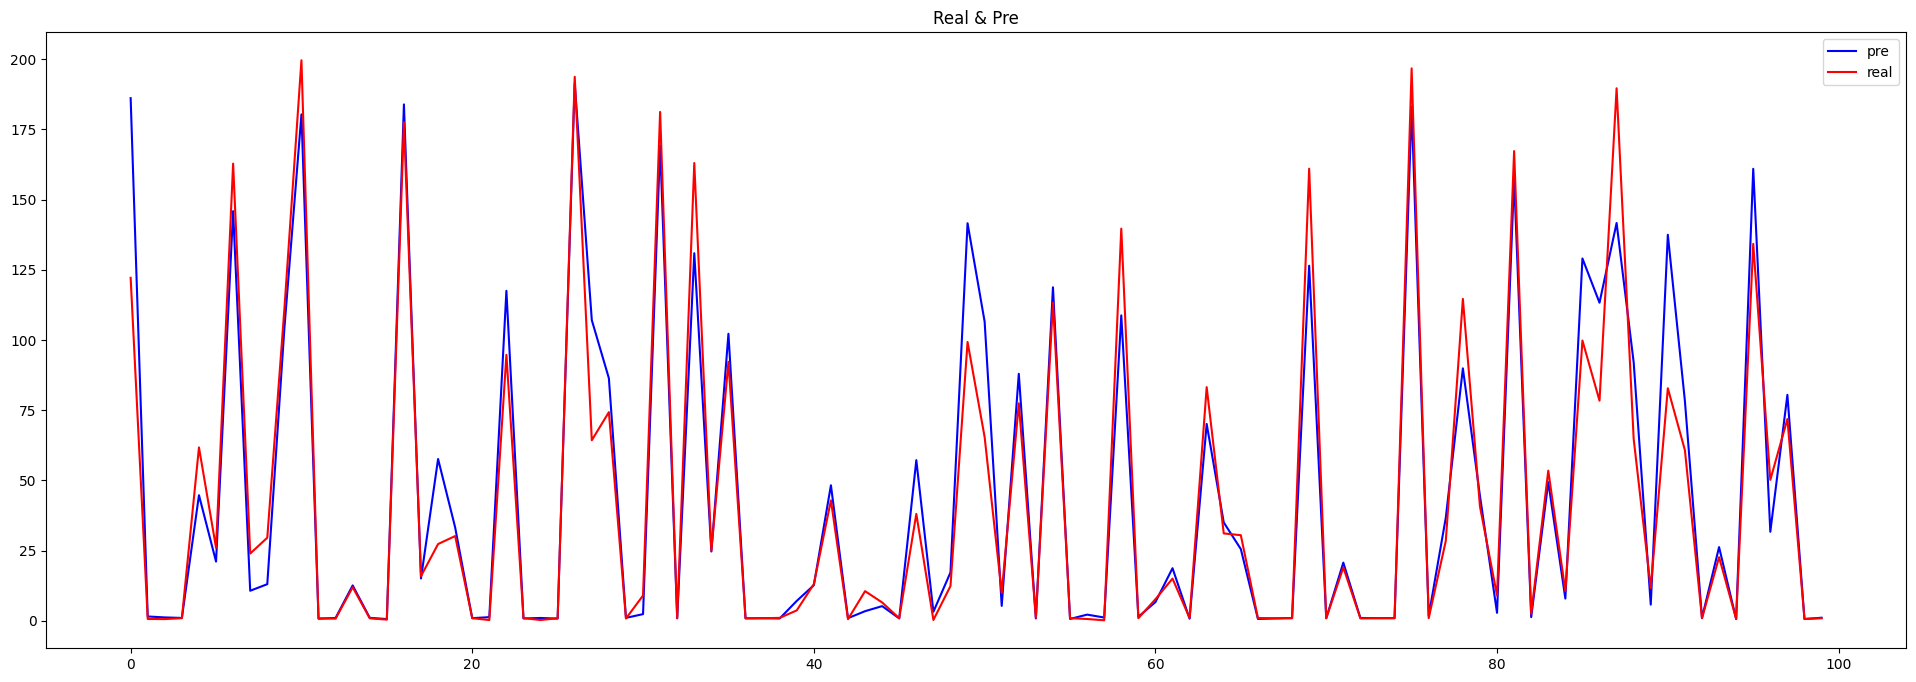

In [135]:
plt.figure(figsize=(24, 8))   
plt.plot(ans[100:200], color='blue',label='pre')
plt.plot(y_test[100:200], color='red', label='real')


plt.legend(loc='best')
plt.title('Real & Pre')
plt.show(block=False)

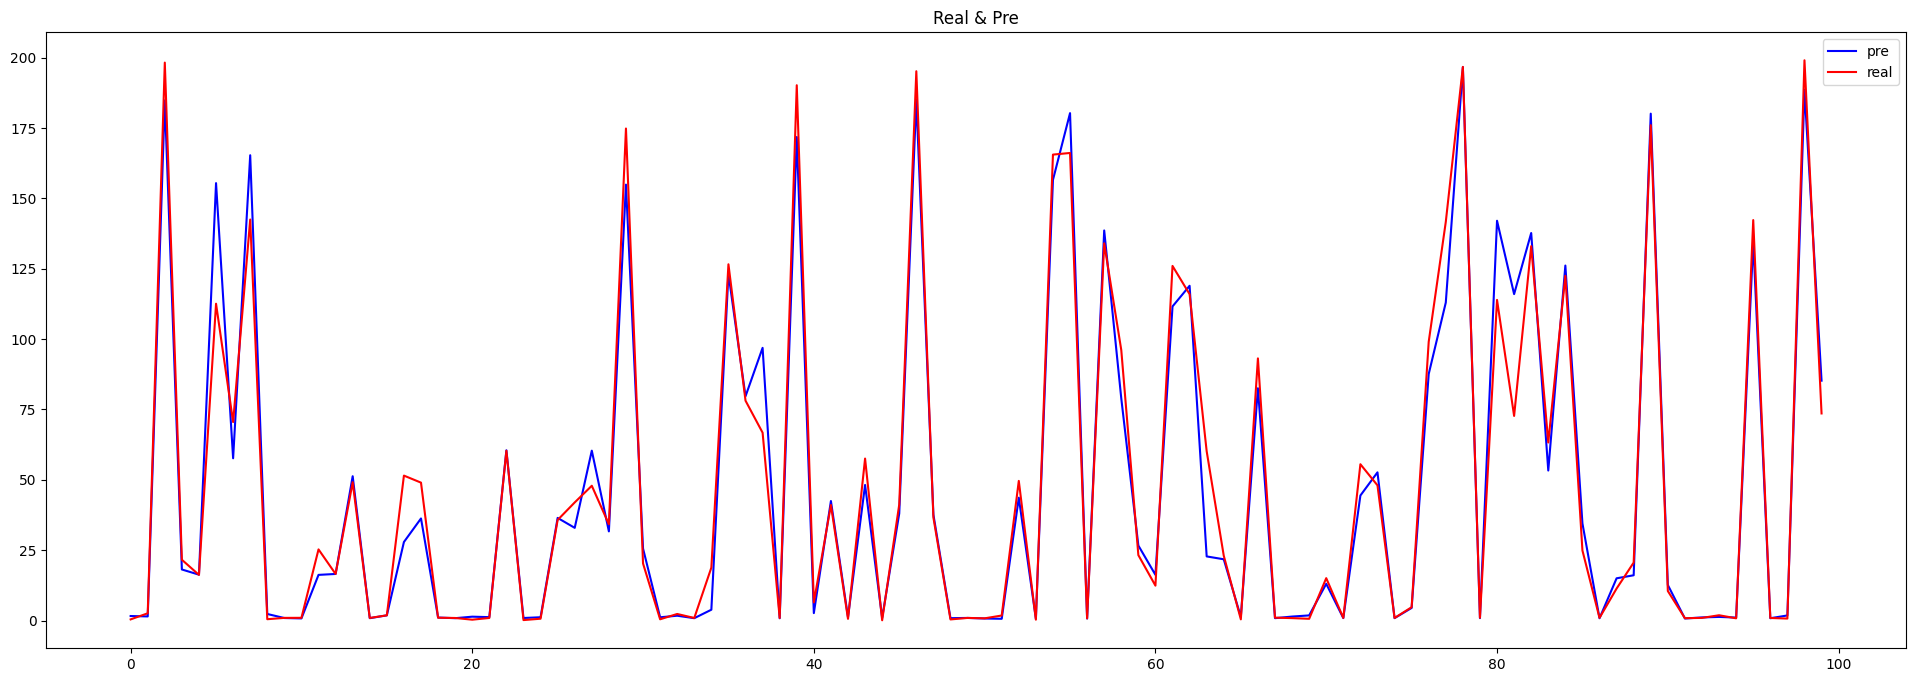

In [136]:
plt.figure(figsize=(24, 8))   
plt.plot(ans[200:300], color='blue',label='pre')
plt.plot(y_test[200:300], color='red', label='real')


plt.legend(loc='best')
plt.title('Real & Pre')
plt.show(block=False)

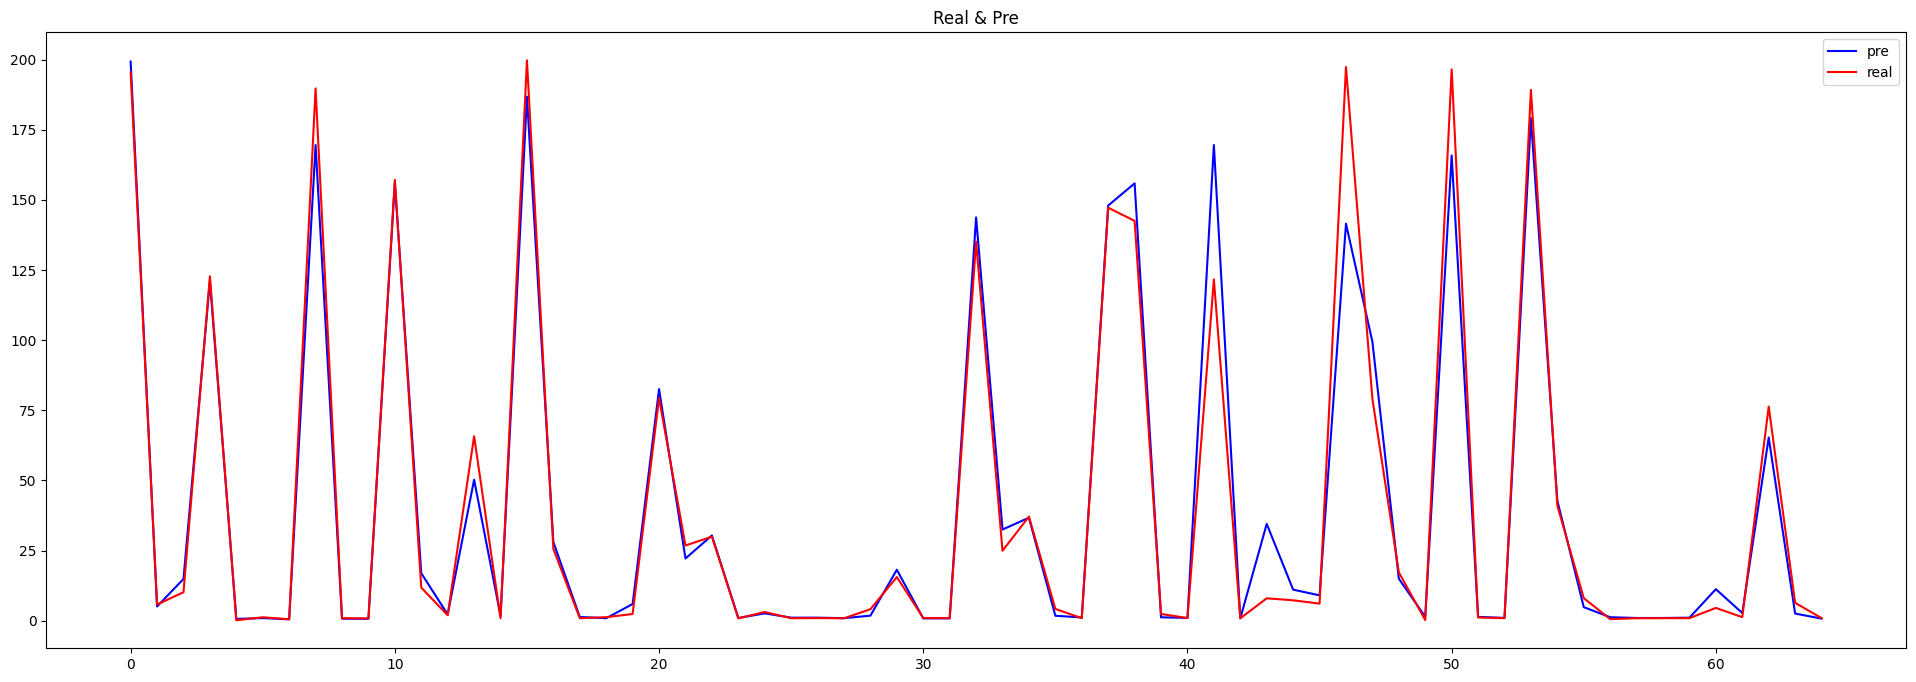

In [137]:
plt.figure(figsize=(24, 8))   
plt.plot(ans[300:365], color='blue',label='pre')
plt.plot(y_test[300:365], color='red', label='real')


plt.legend(loc='best')
plt.title('Real & Pre')
plt.show(block=False)

In [138]:
# 使用sklearn调用衡量线性回归的MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, ans))
print("mean_squared_error:", mean_squared_error(y_test, ans))
print("rmse:", sqrt(mean_squared_error(y_test, ans)))
print("r2 score:", r2_score(y_test, ans))

mean_absolute_error: 7.295649224848969
mean_squared_error: 186.76191107060694
rmse: 13.666086165051315
r2 score: 0.9474910789935374


In [139]:
import numpy as np
np.mean(y_test - ans)

0.5468504225724837

In [140]:
y_test - ans

array([-4.74719804e+00, -9.37875794e+00,  2.47425380e-01,  3.03646043e-01,
       -4.14049313e+01, -4.68754806e+00,  4.09677387e-01, -7.36619244e+00,
       -3.29750673e-02,  1.49898708e-02, -6.33518746e-01, -1.25431068e-02,
       -3.38363128e-01,  5.45192326e-02, -2.57524412e+01, -1.29657201e+00,
       -3.64465244e-01,  2.46980665e-02, -1.22627979e-01, -3.65846170e+00,
        2.52563111e+00, -1.69254853e-02,  5.89677087e+00, -7.71899371e+00,
       -2.41129010e+00,  1.12781171e-01,  9.82869285e-01, -2.88408482e+00,
        4.24360820e+00,  5.66467901e+00,  1.21302143e+00, -8.29491777e-02,
       -9.38739185e-02,  6.89889483e+00, -8.75088126e+00, -4.43743658e-03,
       -5.29435684e+00,  1.88016259e+01, -4.31261649e+00, -6.13235821e+00,
       -3.08851585e+00, -3.84886896e-02,  1.12844602e-01,  4.51367241e+00,
        9.40430511e-02,  1.30194700e+01,  1.44520059e+00,  7.40929630e+00,
       -7.47089278e+00,  3.20004475e+01, -9.10997753e-02, -1.08104003e+01,
       -1.17669596e+00, -

In [141]:
np.max(y_test - ans)

72.11289819335937

In [142]:
np.min(y_test - ans)

-63.96384435546875

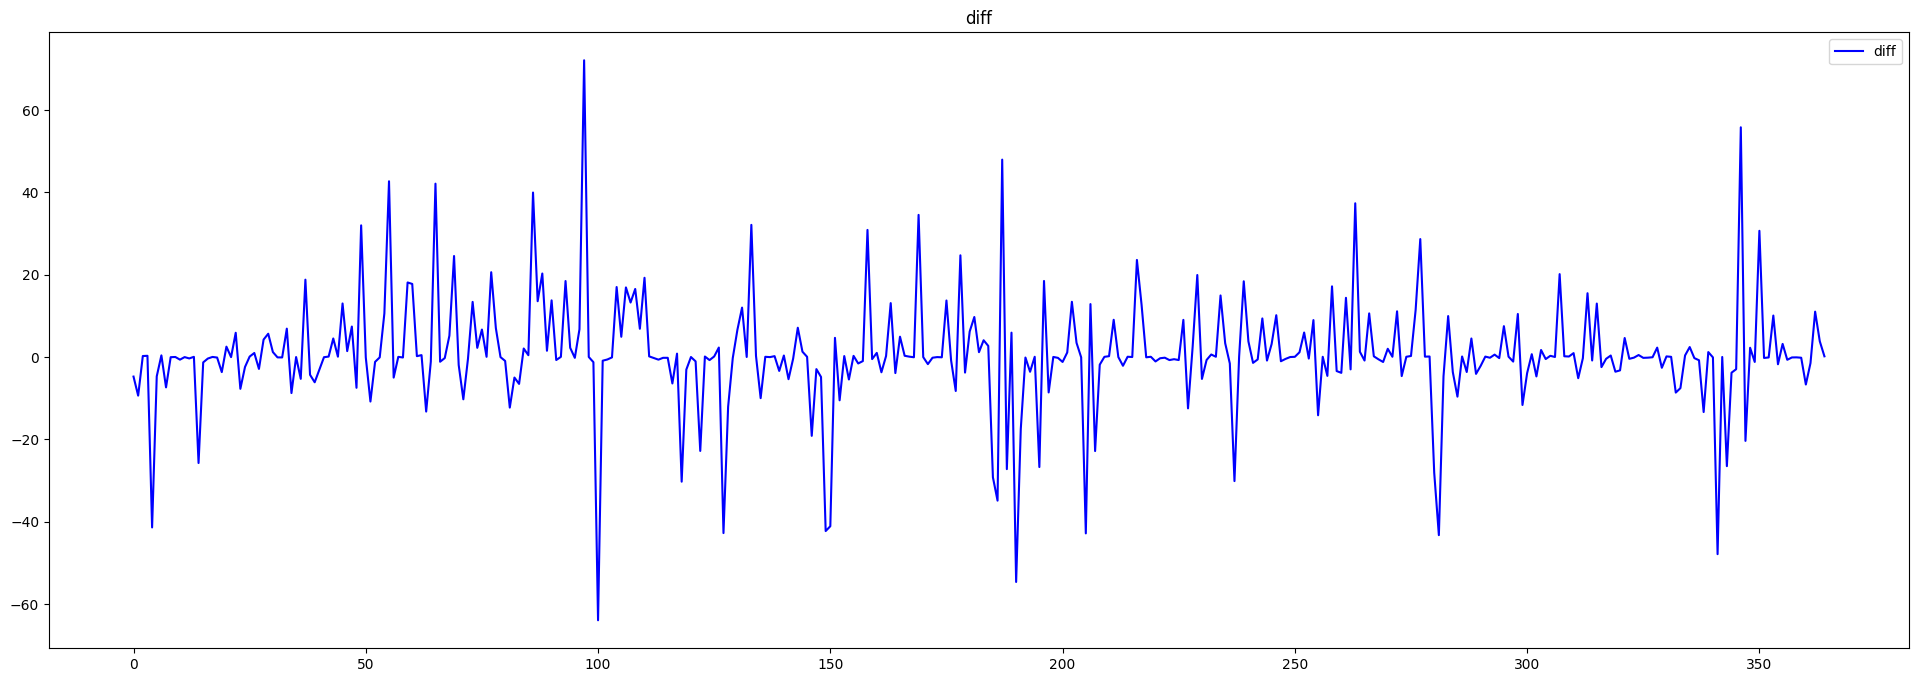

In [143]:
plt.figure(figsize=(24, 8))   
plt.plot(y_test - ans, color='blue',label='diff')

plt.legend(loc='best')
plt.title('diff')
plt.show(block=False)